# DSCI550 Project
## Classification of the Edibility of Gilled Mushrooms: Does Beauty Means Danger?
### Yiqiao Zhang, Yifan Wang, Wenyu Shang


In [1]:
# test connect
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# phase 1: Exploratory Data Analysis

In [2]:
# read data
# note to up and ruru : change path before run it
mushroom = pd.read_csv('mushrooms.csv')
# mushroom = pd.read_csv('/Users\Wenyu\Desktop\DSCI 550 Data Science at Scale\project/mushrooms.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

From this quick overview, we can see:
1. There is no null value in the entire dataset.
2. All variables are categorical variable.

In [4]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


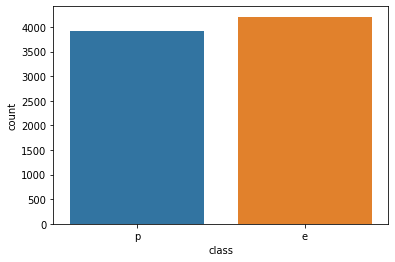

In [5]:
sns.countplot(data = mushroom, x = 'class')

The ratio of poisonous and edible mushroom is about 1:1

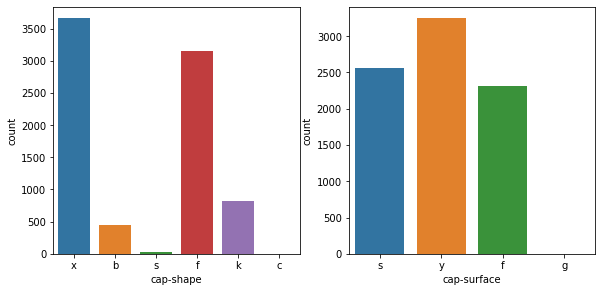

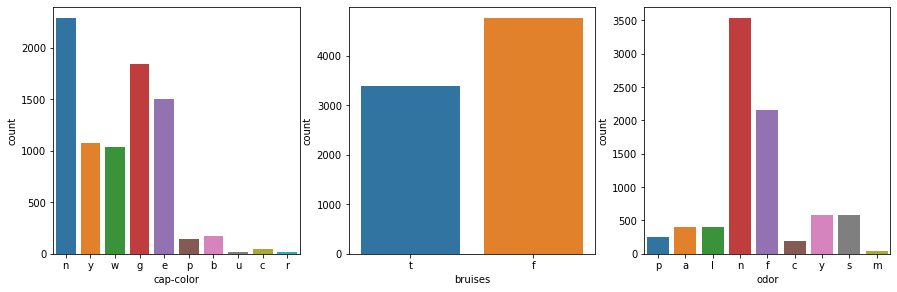

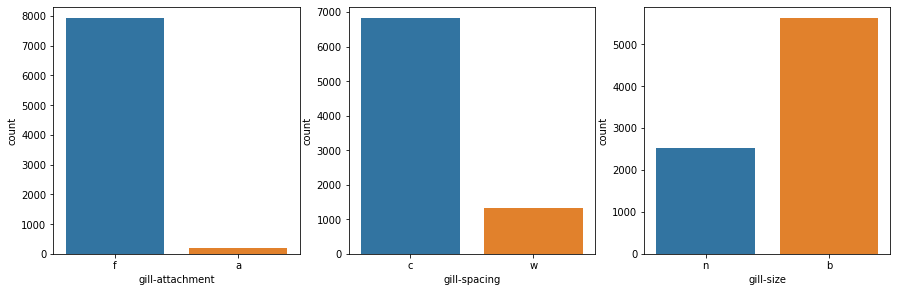

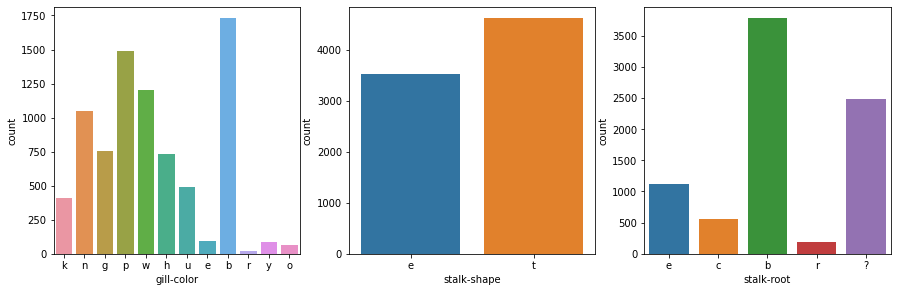

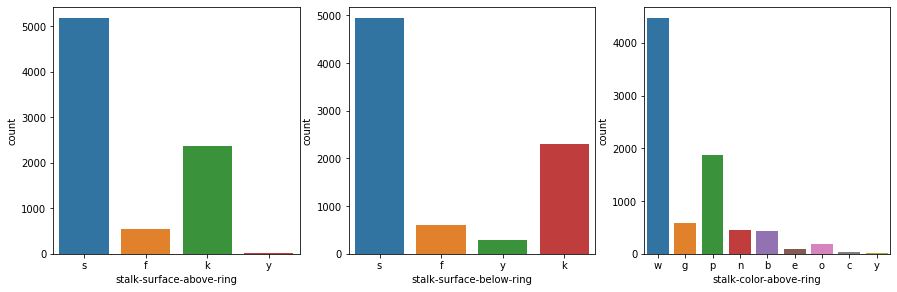

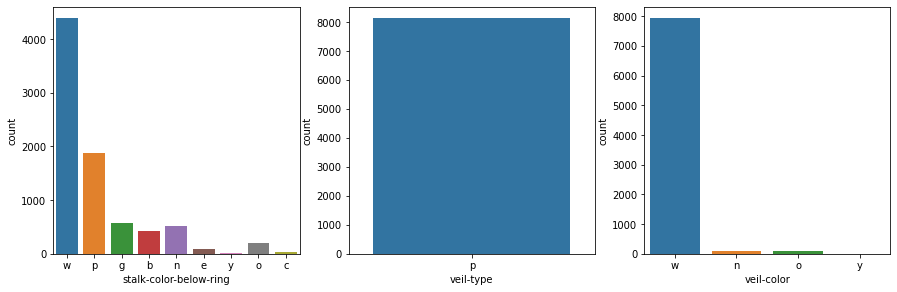

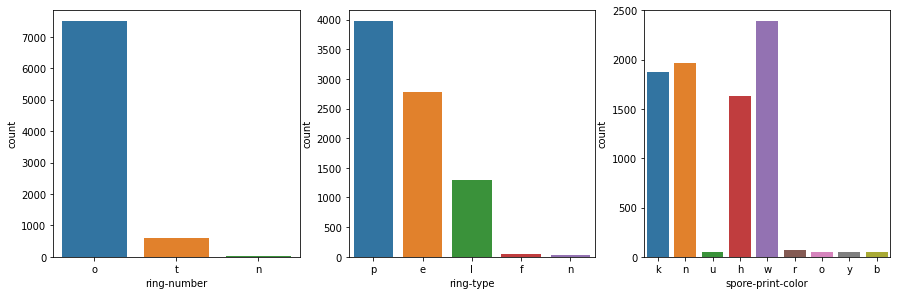

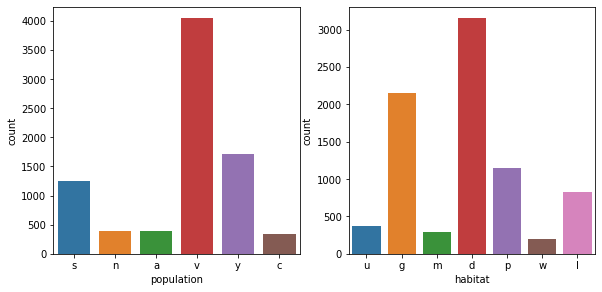

In [6]:
# draw countplot to see the frequency of each cat variables.
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(mushroom.columns):
    if ix <= 3:
        if c != 'class':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = mushroom, x=c, ax = ax1)
    ix = ix +1
    if ix == 4:
        fig = plt.figure(figsize = (15,10))
        ix =1

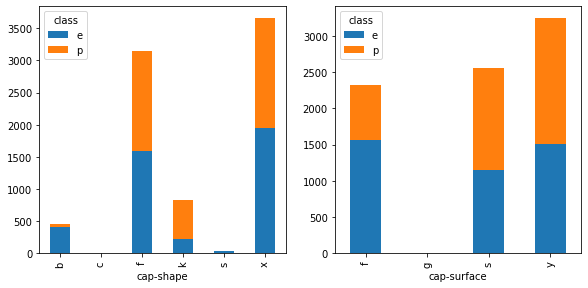

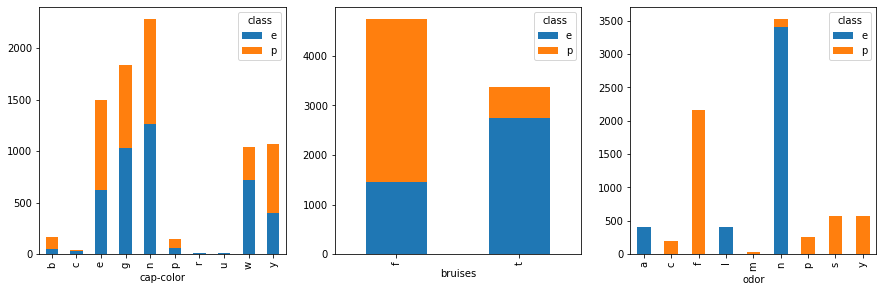

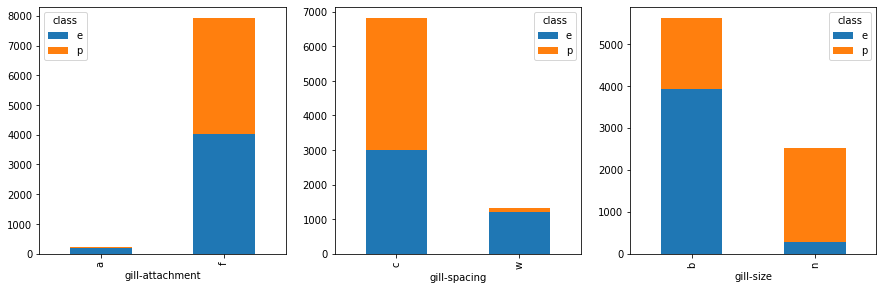

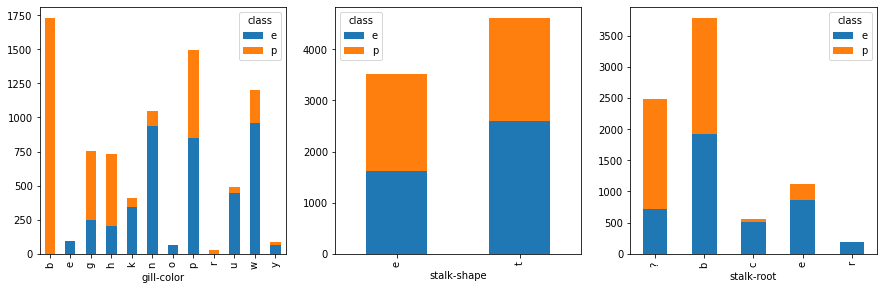

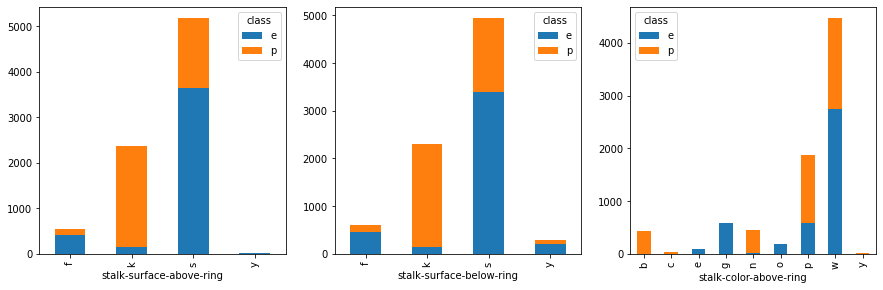

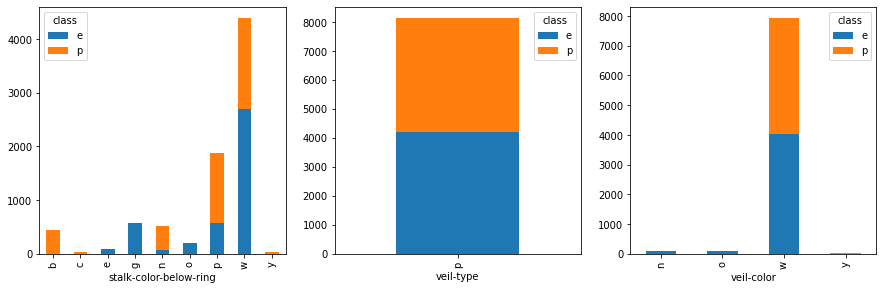

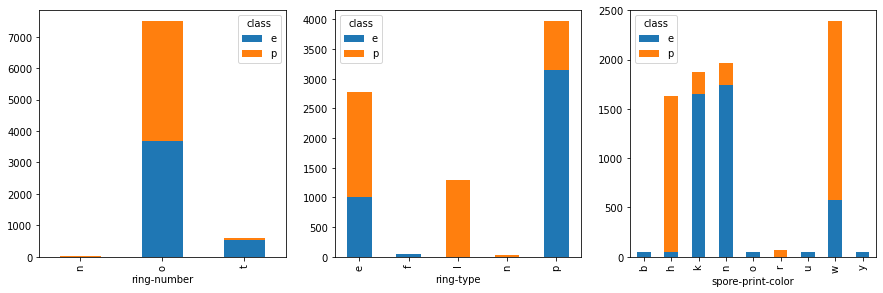

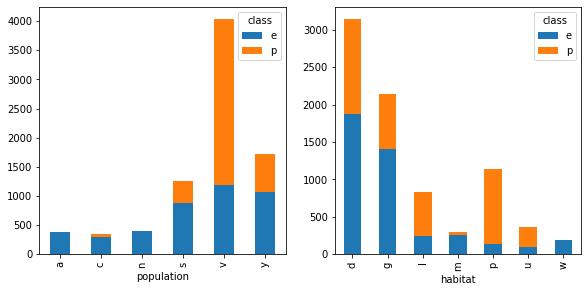

In [7]:
#draw stacked bar chart to see for each class of variables, what proportion of mushrooms are Poisonous vs. edible
an = 1
fig = plt.figure(figsize = (15,10))
for c in list(mushroom.columns):
    if an <= 3:
        if c != 'class':
            ax1 = fig.add_subplot(2,3,an)
            pd.crosstab(mushroom[c], mushroom['class']).plot(kind='bar', stacked=True, ax=ax1)
    an = an +1
    if an == 4:
        fig = plt.figure(figsize = (15,10))
        an =1

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
mushroom_encode = mushroom
for i in mushroom_encode.columns:
    mushroom_encode[i]=encoder.fit_transform(mushroom_encode[i])
mushroom_encode.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Text(0.5, 1.0, 'Correlation heatmap for variables')

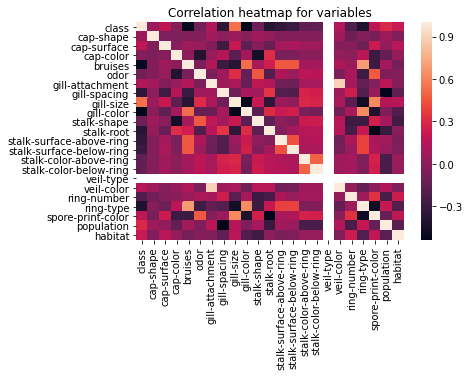

In [9]:
#draw heatmap for all variables, understand the correlation between variables.
p = mushroom_encode.corr()
sns.heatmap(p, xticklabels=True, yticklabels=True)
plt.title("Correlation heatmap for variables")

# phase 2: machine learning models

## 2.1 Decision Tree

In [10]:
# split dataset in features and target variable
# features
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
            'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
            'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
            'stalk-surface-below-ring', 'stalk-color-above-ring',
            'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
            'ring-type', 'spore-print-color', 'population', 'habitat']
X = mushroom[features]
# target variable
y = mushroom['class']

In [11]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 2.1.1 Catboost

Use catboost package to do the decision tree model first.
The advantage of the package is it can deal with categorical variables easily.

In [12]:
import catboost
cbc = catboost.CatBoostClassifier(random_seed=0, loss_function=None)
cbc.fit(X_train, y_train, cat_features = list(X_train.columns),logging_level='Silent')

In [13]:
acc = accuracy_score(y_test, cbc.predict(X_test))
print('accuracy of CatBoost Decision Tree Model: {}'.format(acc))

accuracy of CatBoost Decision Tree Model: 1.0


### 2.1.2 DecisionTreeClassifier()

In [14]:
X_encode = mushroom_encode[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                            'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                            'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                            'stalk-surface-below-ring', 'stalk-color-above-ring',
                            'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                            'ring-type', 'spore-print-color', 'population', 'habitat']]
y_encode = mushroom_encode['class']

use sklearn.preprocessing.StandardScaler
Standardize features by removing the mean and scaling to unit variance.

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_encode_sc=sc.fit_transform(X_encode)

In [16]:
# Split dataset into training set and test set
# 70% training and 30% test7
X_train_encode, X_test_encode, y_train_encode, y_test_encode = train_test_split(X_encode_sc, y_encode, test_size=0.3, random_state=2)

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_encode,y_train_encode)

#Predict the response for test dataset
y_pred = clf.predict(X_test_encode)

In [18]:
# Model Accuracy
print("Accuracy of tree decision classifier is:",metrics.accuracy_score(y_test_encode, y_pred))

Accuracy of tree decision classifier is: 1.0


### 2.2 Naive Bayes Classifier

In [19]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_encode,y_train_encode)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
# Use confusion matrix for result analysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred_nb_train=nb.predict(X_train_encode)
y_pred_nb_test=nb.predict(X_test_encode)
print(confusion_matrix(y_train_encode,y_pred_nb_train))
print(confusion_matrix(y_test_encode,y_pred_nb_test))

[[2704  206]
 [ 208 2568]]
[[1211   87]
 [ 101 1039]]


In [21]:
# Use classification report to get general evaluation metrics
print(classification_report(y_train_encode,y_pred_nb_train))
print(classification_report(y_test_encode,y_pred_nb_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2910
           1       0.93      0.93      0.93      2776

    accuracy                           0.93      5686
   macro avg       0.93      0.93      0.93      5686
weighted avg       0.93      0.93      0.93      5686

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1298
           1       0.92      0.91      0.92      1140

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



In [22]:
# accuracy of using naive bayes classifier
print("The accuracy of training data naive bayes classifier is ",round(accuracy_score(y_train_encode,y_pred_nb_train),4))
print("The accuracy of test data naive bayes classifier is ",round(accuracy_score(y_test_encode,y_pred_nb_test),4))

The accuracy of training data naive bayes classifier is  0.9272
The accuracy of test data naive bayes classifier is  0.9229


### 2.3 SVC Classifier

In [23]:
from sklearn.svm import SVC
svc_linear=SVC(kernel='linear',gamma='auto')
svc_linear.fit(X_train_encode,y_train_encode)
svc_sigmoid=SVC(kernel='sigmoid',gamma='auto')
svc_sigmoid.fit(X_train_encode,y_train_encode)
svc_poly=SVC(kernel='poly',gamma='auto')
svc_poly.fit(X_train_encode,y_train_encode)
svc_rbf=SVC(kernel='rbf',gamma='auto')
svc_rbf.fit(X_train_encode,y_train_encode)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
y_pred_sigmoid=svc_sigmoid.predict(X_test_encode)
y_pred_linear=svc_linear.predict(X_test_encode)
y_pred_poly=svc_poly.predict(X_test_encode)
y_pred_rbf=svc_rbf.predict(X_test_encode)

In [25]:
print(confusion_matrix(y_test_encode,y_pred_sigmoid))
print(confusion_matrix(y_test_encode,y_pred_linear))
print(confusion_matrix(y_test_encode,y_pred_poly))
print(confusion_matrix(y_test_encode,y_pred_rbf))

[[1093  205]
 [ 221  919]]
[[1268   30]
 [  25 1115]]
[[1298    0]
 [   0 1140]]
[[1298    0]
 [   0 1140]]


In [26]:
print(classification_report(y_test_encode,y_pred_sigmoid))
print(classification_report(y_test_encode,y_pred_linear))
print(classification_report(y_test_encode,y_pred_poly))
print(classification_report(y_test_encode,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1298
           1       0.82      0.81      0.81      1140

    accuracy                           0.83      2438
   macro avg       0.82      0.82      0.82      2438
weighted avg       0.83      0.83      0.83      2438

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1298
           1       0.97      0.98      0.98      1140

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

              preci

In [27]:
print("The accuracy of SVC with sigmoid kernel is ",round(accuracy_score(y_test_encode,y_pred_sigmoid),4))
print("The accuracy of SVC with linear kernel is ",round(accuracy_score(y_test_encode,y_pred_linear),4))
print("The accuracy of SVC with poly kernel is ",accuracy_score(y_test_encode,y_pred_poly))
print("The accuracy of SVC with rbf kernel is ",accuracy_score(y_test_encode,y_pred_rbf))

The accuracy of SVC with sigmoid kernel is  0.8253
The accuracy of SVC with linear kernel is  0.9774
The accuracy of SVC with poly kernel is  1.0
The accuracy of SVC with rbf kernel is  1.0


### 2.4 Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression(solver='lbfgs')

In [29]:
model_LR.fit(X_train_encode,y_train_encode)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_prob = model_LR.predict_proba(X_test_encode)[:,1] # This will give you positive class prediction probabilities
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

print("The accuracy of Logistic regression is ",model_LR.score(X_test_encode, y_pred))

The accuracy of Logistic regression is  1.0


In [31]:
confusion_matrix=metrics.confusion_matrix(y_test_encode,y_pred)
confusion_matrix

array([[1251,   47],
       [  58, 1082]], dtype=int64)

In [32]:
auc_roc=metrics.roc_auc_score(y_test_encode,y_pred)
print("The accuracy of auc_roc is ",auc_roc)

The accuracy of auc_roc is  0.9564566269294192


In [33]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_encode, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("The accuracy of auc is",roc_auc)

The accuracy of auc is 0.985904089962966


Text(0.5, 0, 'False Positive Rate')

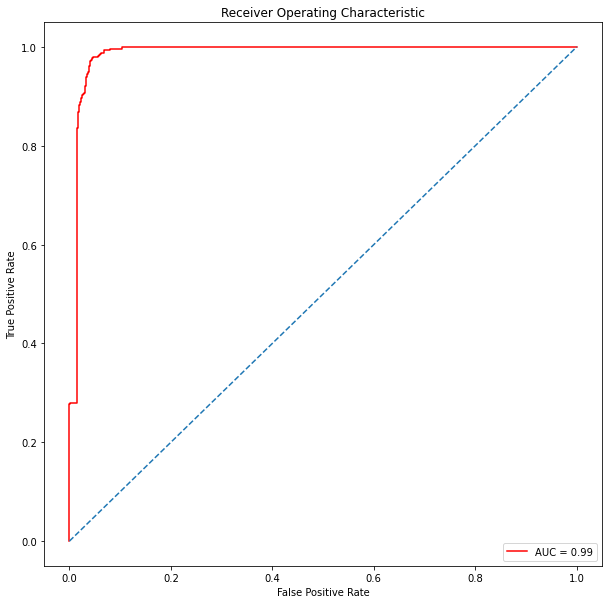

In [34]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### 2.5 KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
result=[]
knn_n=[5,6,7,8,9,10,20,30,50]
for i in knn_n:
    classifier=KNeighborsClassifier(n_neighbors=i,weights = 'distance', metric='minkowski',p=2)
    classifier.fit(X_train_encode,y_train_encode)
    y_pred=classifier.predict(X_test_encode)
    acc=accuracy_score(y_test_encode, y_pred)
    result.append(acc)
    print("The accuracy of KNN with neighbors=",i,"is",acc)

The accuracy of KNN with neighbors= 5 is 1.0
The accuracy of KNN with neighbors= 6 is 1.0
The accuracy of KNN with neighbors= 7 is 1.0
The accuracy of KNN with neighbors= 8 is 1.0
The accuracy of KNN with neighbors= 9 is 1.0
The accuracy of KNN with neighbors= 10 is 0.9995898277276456
The accuracy of KNN with neighbors= 20 is 0.9983593109105825
The accuracy of KNN with neighbors= 30 is 0.9954881050041017
The accuracy of KNN with neighbors= 50 is 0.9942575881870386


(0.96, 1.005)

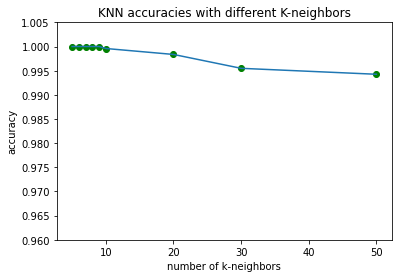

In [36]:
plt.plot(knn_n,result)
plt.scatter(knn_n,result,c='g')
plt.title("KNN accuracies with different K-neighbors")
plt.xlabel("number of k-neighbors")
plt.ylabel("accuracy")
plt.ylim(top=1.005,bottom=0.96)